In [228]:
## Import and read the raw data
import pandas as pd

data = pd.read_csv('bank-additional-full.csv', delimiter=';')
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [229]:
## Basic statistics about the raw data set
data.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [275]:
from sklearn.preprocessing import OrdinalEncoder

def encode_to_ordinal(array):
    ordinal_encoder = OrdinalEncoder(dtype=np.int)
    return ordinal_encoder.fit_transform(array.reshape(-1,1))


In [276]:
# Encode the desired target ("y") to a binary representation
ordinal_encoder = OrdinalEncoder()
# data.y = ordinal_encoder.fit_transform(data.y.values.reshape(-1,1))
y_encoded = encode_to_ordinal(data.y.values)


In [282]:
from sklearn.preprocessing import OneHotEncoder
import numpy as np

# One-hot encoding for categorical features
one_hot_encoder = OneHotEncoder(dtype=np.int, sparse=True)

# start assembling cleaned data
clean_data = pd.DataFrame(one_hot_encoder.fit_transform(data[['job', 'marital','education','default','housing','loan','contact','month','day_of_week','poutcome']]).toarray())
# one_hot_encoder.categories_
clean_data['age'] = data['age']
clean_data['campaign'] = data['campaign']
clean_data['pdays'] = data['pdays']
clean_data['previous'] = data['previous']
clean_data['emp.var.rate'] = data['emp.var.rate']
clean_data['cons.price.idx'] = data['cons.price.idx']
clean_data['cons.conf.idx'] = data['cons.conf.idx']
clean_data['euribor3m'] = data['euribor3m']
clean_data['nr.employed'] = data['nr.employed']
clean_data['y'] = y_encoded
clean_data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,56,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0
1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,57,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0
2,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,37,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0
3,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,40,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0
4,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,56,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0


array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'campaign'}>,
        <AxesSubplot:title={'center':'pdays'}>],
       [<AxesSubplot:title={'center':'previous'}>,
        <AxesSubplot:title={'center':'emp.var.rate'}>,
        <AxesSubplot:title={'center':'cons.price.idx'}>],
       [<AxesSubplot:title={'center':'cons.conf.idx'}>,
        <AxesSubplot:title={'center':'euribor3m'}>,
        <AxesSubplot:title={'center':'nr.employed'}>],
       [<AxesSubplot:title={'center':'y'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

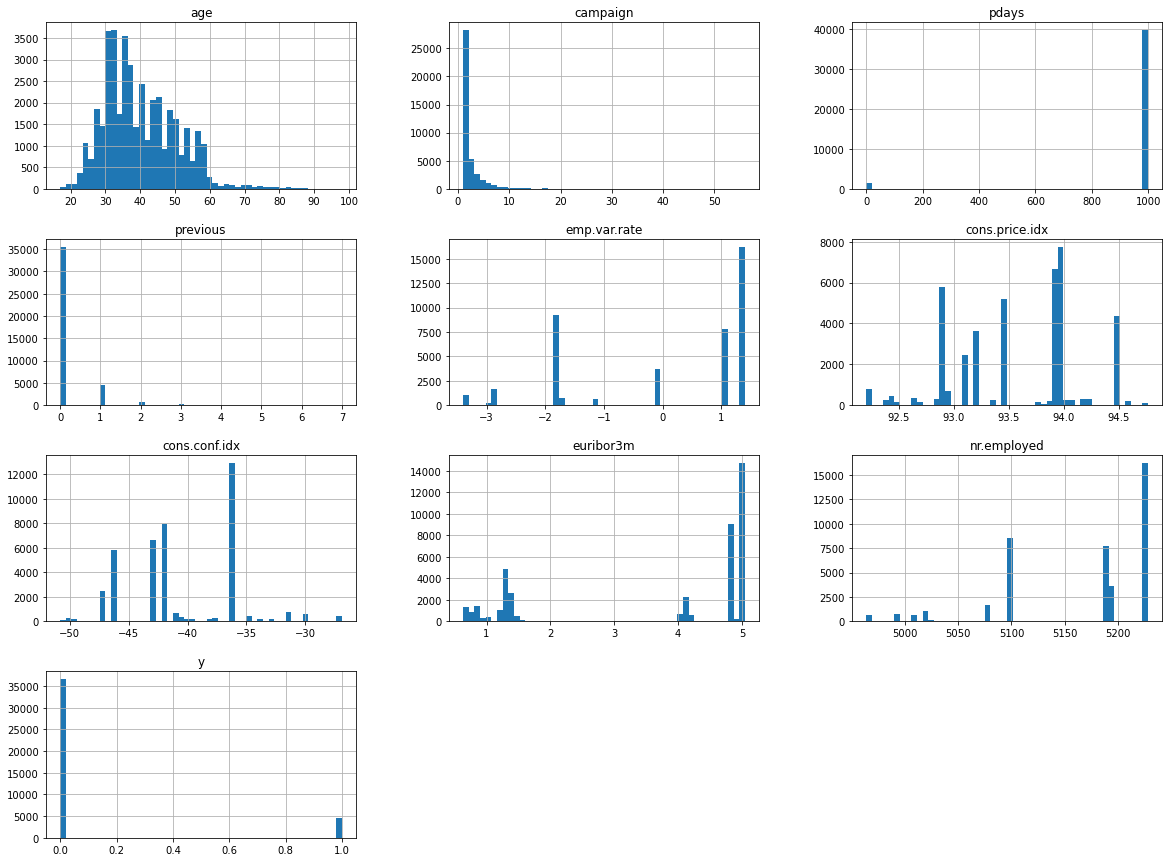

In [284]:
## Generate histograms for numerical features in processed data
import matplotlib.pyplot as plt

%matplotlib inline

histogram_columns = clean_data[['age', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'y']]
histogram_columns.hist(bins=50, figsize=(20,15))

In [286]:
## Search for correlations
correlation_matrix = clean_data.corr()
correlation_matrix['y'].sort_values(ascending = False)

y               1.000000
52              0.316269
previous        0.230181
33              0.144773
40              0.144014
                  ...   
51             -0.193507
emp.var.rate   -0.298334
euribor3m      -0.307771
pdays          -0.324914
nr.employed    -0.354678
Name: y, Length: 63, dtype: float64